## PROJECT NAME : Glassdoor Salary Prediction using Machine Learning



#### Made By : Siddhesh Bhurke

##### Summary 
- The primary objective of this project is to build a machine learning model that can predict salary estimates for job postings using real-world data sourced from Glassdoor. The dataset contains various features such as job title, company rating, location, industry, company size, sector, ownership type, and more. These features are used to train predictive models that estimate salaries based on multiple job attributes.

- The project involves multiple stages including data cleaning, feature engineering, exploratory data analysis (EDA), model selection, hyperparameter tuning, and model evaluation. Both regression algorithms and ensemble learning methods such as Random Forest Regressor and XGBoost Regressor are implemented and compared for their performance.

- Additionally, the project includes deployment of the trained model using an interactive user interface (UI) where users can input job parameters and receive a predicted salary estimate. The solution demonstrates practical application of machine learning for real-world business problems in human resources, recruitment, and job market analysis.



#####  GitHub Link : 
https://github.com/siddheshbhurke/Glass-Door-salary-prediction

##### Problem Statement 

In today's competitive job market, determining appropriate salary estimates for job roles across various industries is a complex task influenced by multiple factors such as job title, company size, industry, location, and company rating. Job seekers often struggle to assess their market worth, while employers face challenges in offering competitive yet sustainable salary packages.

The absence of transparent and data-driven salary estimation models leads to inefficiencies in recruitment, potential employee dissatisfaction, and negotiation hurdles. There is a growing need for automated systems that can leverage historical job data to accurately predict salary ranges based on job attributes.

This project aims to develop a machine learning-based salary prediction system using real-world Glassdoor job data. The model will analyze key job features and generate reliable salary estimates, thereby assisting job seekers, HR professionals, and companies in making informed compensation decisions.



##### OBJECTIVES

The main objective of this project is to design and implement a machine learning-based predictive system that estimates the salary for a given job profile using historical Glassdoor job data.
The specific objectives include:
- **Data Acquisition & Preprocessing**: Clean and preprocess the Glassdoor dataset, handle missing values, and perform feature engineering to extract meaningful insights.
- **Exploratory Data Analysis (EDA)**: Analyze the relationships and correlations between various job-related features and salary estimates.
- **Model Development**: Build and train multiple machine learning regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict salaries based on input job parameters.
- **Model Evaluation & Optimization**: Evaluate model performance using appropriate regression metrics (RMSE, MAE, R² Score) and optimize through hyperparameter tuning.
- **Deployment**: Develop an interactive front-end interface using Streamlit where users can input job details and receive real-time salary predictions.
- **Real-world Application**: Provide a data-driven tool that can assist HR professionals, recruiters, and job seekers in estimating fair salary ranges based on job characteristics.




**1. Knowing Your Data**

In [183]:
#Import all Libraries 

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib


In [184]:
# Load the dataset
df = pd.read_csv('glassdoor_jobs.csv')

In [185]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [186]:
df.shape

(956, 15)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [188]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

**2. DATA WRANGLING, FEATURE ENGINEERING AND PREPROCESSING** 

In [189]:
# HANDLING COMPETITORS COLUMN 

# Replace '-1' and NaN with 'No Competitors'
df['Competitors'] = df['Competitors'].replace('-1', np.nan)
df['Competitors'] = df['Competitors'].fillna('No Competitors')

# Create a new feature: count of competitors
def count_competitors(comp):
    if comp == 'No Competitors':
        return 0
    else:
        return len(comp.split(','))

df['competitor_count'] = df['Competitors'].apply(count_competitors)

# Drop original Competitors column if you want
df.drop('Competitors', axis=1, inplace=True)

In [190]:
# HANDLING SALARY ESTIMATE COLUMN 

# Remove rows where salary estimate is -1
df = df[df['Salary Estimate'] != '-1']

In [191]:
# HANDLING SALARY ESTIMATE

# Replace -1 values in Rating with median
# First make a full copy after filtering (safe practice)
df = df[df['Salary Estimate'] != '-1'].copy()

# Replace -1 in Rating with np.nan
df.loc[:, 'Rating'] = df['Rating'].replace(-1, np.nan)

# Replace NaNs with median
df.loc[:, 'Rating'] = df['Rating'].fillna(df['Rating'].median())


In [192]:
# HANDLING FOUNDED COLUMN 

# Replace -1 values in Founded with 0 (assume unknown founded date)
df['Founded'] = df['Founded'].replace(-1, 0)

In [193]:
# HANDLING REVENUE COLUMN 

df['Revenue'] = df['Revenue'].replace('-1', 'Unknown')

In [194]:
# Handle Company age column 

# Create feature: company_age
df['company_age'] = df['Founded'].apply(lambda x: 2024 - x if x > 0 else 0)

In [195]:
# Handle Ownership type 

df['Type of ownership'] = df['Type of ownership'].fillna('Unknown')

In [196]:
# Extract job state from Location
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1].strip())

In [197]:
import re

# Define robust salary parser function
def parse_salary(sal):
    try:
        # Remove unwanted text, parentheses and special characters
        sal = re.sub(r'Employer Provided Salary:|Glassdoor est\.|Per Hour|Per Year|\(\)', '', sal)
        sal = sal.replace('$','').replace('K','').replace(' ','')
        
        # Handle cases where non-numeric junk may exist
        sal = re.sub(r'[^\d\-]', '', sal)
        
        if '-' in sal:
            min_sal, max_sal = sal.split('-')
            min_sal = int(min_sal) if min_sal else 0
            max_sal = int(max_sal) if max_sal else 0
        else:
            min_sal = max_sal = int(sal) if sal else 0
    except:
        min_sal = max_sal = 0
        
    return pd.Series([min_sal, max_sal])

# Apply salary extraction only on rows where salary estimate is not missing
df = df[df['Salary Estimate'] != '-1']

# Apply salary parser to dataset
df[['min_salary', 'max_salary']] = df['Salary Estimate'].apply(parse_salary)

# Compute avg salary column
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

# Drop original Salary Estimate column
df.drop('Salary Estimate', axis=1, inplace=True)

# Preview the result
print(df[['min_salary', 'max_salary', 'avg_salary']].head())


   min_salary  max_salary  avg_salary
0          53          91        72.0
1          63         112        87.5
2          80          90        85.0
3          56          97        76.5
4          86         143       114.5


In [198]:
# Extract company name
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [199]:
# Create feature: company_age
df['company_age'] = df['Founded'].apply(lambda x: 2024 - x if x > 0 else 0)

In [200]:
# Simplify ownership type
df['Type of ownership'] = df['Type of ownership'].fillna('Unknown')


In [201]:
# Use Label Encoding for simplicity (can replace with OneHotEncoder if needed)
le = LabelEncoder()

categorical_cols = ['Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [202]:
#HANDLE JOD DESCRIPTION 

# Fill missing descriptions
df['Job Description'] = df['Job Description'].fillna('').str.lower()

# Clean: remove newline, tabs, excessive spaces (optional)
df['Job Description'] = df['Job Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Extract useful binary features
df['python_yn']     = df['Job Description'].apply(lambda x: 1 if 'python' in x else 0)
df['r_yn']          = df['Job Description'].apply(lambda x: 1 if ' r ' in x or 'r studio' in x else 0)
df['sql_yn']        = df['Job Description'].apply(lambda x: 1 if 'sql' in x else 0)
df['aws_yn']        = df['Job Description'].apply(lambda x: 1 if 'aws' in x else 0)
df['azure_yn']      = df['Job Description'].apply(lambda x: 1 if 'azure' in x else 0)
df['spark_yn']      = df['Job Description'].apply(lambda x: 1 if 'spark' in x else 0)
df['hadoop_yn']     = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x else 0)
df['excel_yn']      = df['Job Description'].apply(lambda x: 1 if 'excel' in x else 0)
df['tableau_yn']    = df['Job Description'].apply(lambda x: 1 if 'tableau' in x else 0)
df['sas_yn']        = df['Job Description'].apply(lambda x: 1 if 'sas' in x else 0)
df['docker_yn']     = df['Job Description'].apply(lambda x: 1 if 'docker' in x else 0)
df['kubernetes_yn'] = df['Job Description'].apply(lambda x: 1 if 'kubernetes' in x else 0)
df['security_clearance'] = df['Job Description'].apply(lambda x: 1 if 'security clearance' in x else 0)

# Extract educational degree indicators
df['phd_yn'] = df['Job Description'].apply(lambda x: 1 if 'phd' in x else 0)
df['masters_yn'] = df['Job Description'].apply(lambda x: 1 if 'master' in x or 'ms ' in x else 0)
df['bachelors_yn'] = df['Job Description'].apply(lambda x: 1 if 'bachelor' in x or 'bs ' in x else 0)

df.drop('Job Description', axis=1, inplace=True)


In [203]:
from sklearn.preprocessing import LabelEncoder
import joblib

categorical_cols = ['Job Title', 'Company Name', 'Location', 'Headquarters',
                    'Type of ownership', 'Industry', 'Sector', 'Revenue']


for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # always ensure string type
    le.fit(df[col])
    
    # Save mapping dictionary {label: int}
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    joblib.dump(mapping, f"{col}_mapping.pkl")
    
    # Apply encoding
    df[col] = df[col].map(mapping)


In [204]:
# HANDLE SIZE COLUMN 

# Replace -1 and missing values with 'Unknown'
df['Size'] = df['Size'].replace('-1', 'Unknown').fillna('Unknown')

# Function to extract numeric size
def parse_size(size):
    if size == 'Unknown':
        return np.nan  # leave as NaN for now, we'll fill it later
    
    size = size.replace('employees', '').strip()
    if '+' in size:
        return int(size.replace('+','').strip())
    elif 'to' in size:
        return int(size.split('to')[0].strip())
    else:
        return np.nan  # for safety

# Apply the function
df['size_num'] = df['Size'].apply(parse_size)

# Fill missing sizes with median size
df['size_num'] = df['size_num'].fillna(df['size_num'].median())


In [205]:
df.drop('Size', axis=1, inplace=True)


In [206]:
df.head()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,...,excel_yn,tableau_yn,sas_yn,docker_yn,kubernetes_yn,security_clearance,phd_yn,masters_yn,bachelors_yn,size_num
0,0,69,3.8,294,3,72,1973,3,23,12,...,1,1,1,0,0,0,0,1,1,501.0
1,1,106,3.4,320,99,12,1984,8,21,4,...,0,0,0,0,0,0,0,1,0,10000.0
2,2,69,4.8,164,42,43,2010,3,41,21,...,1,0,1,0,0,0,1,1,0,501.0
3,3,69,3.8,217,154,150,1965,5,10,11,...,0,0,0,0,0,0,0,1,0,1001.0
4,4,69,2.9,13,122,118,1998,3,12,21,...,1,0,1,0,0,0,0,1,0,51.0


**3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

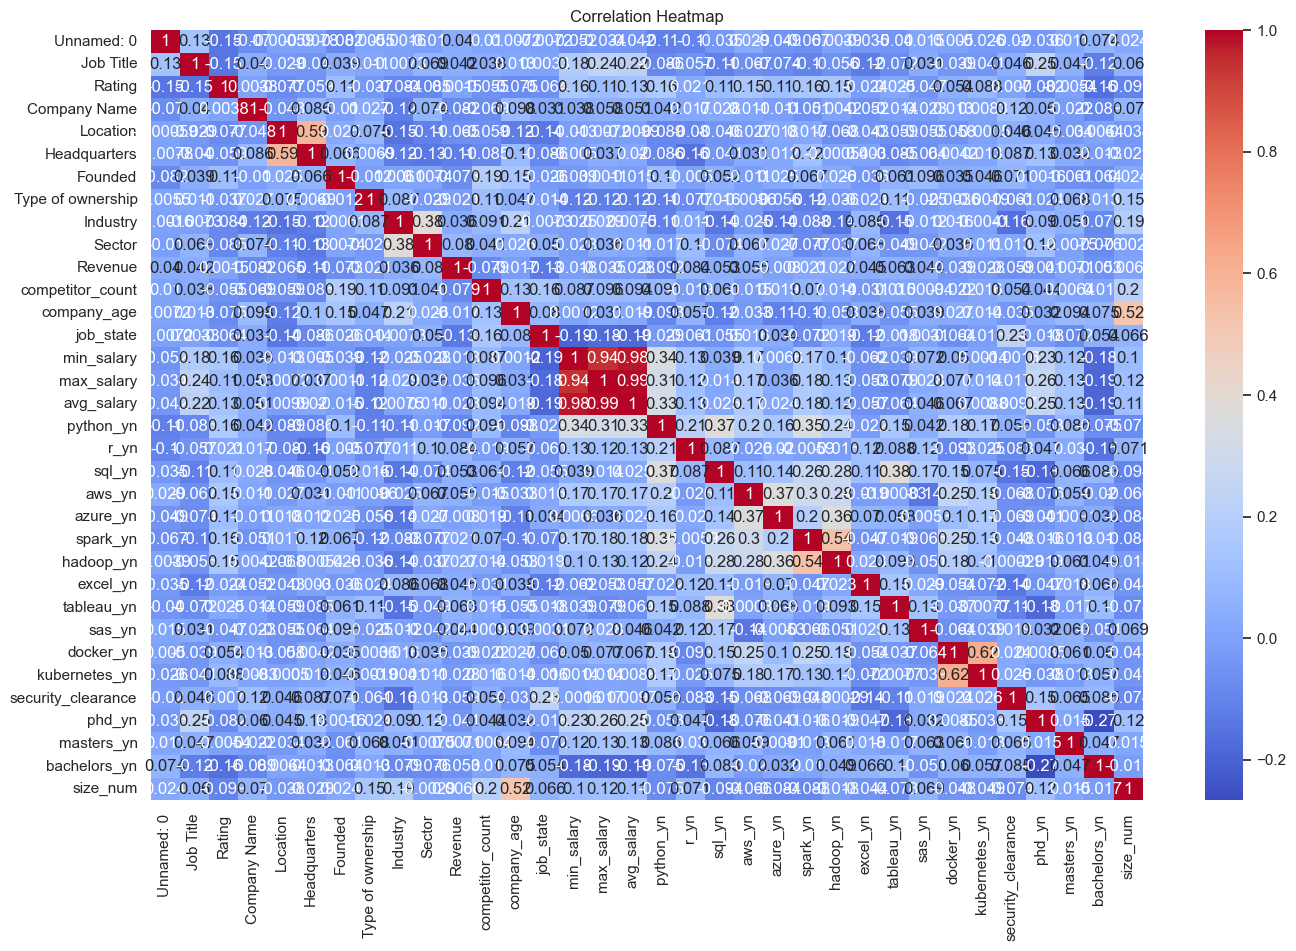

In [207]:
# 1. CORRELATION HEATMAP

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 **Correlation Heatmap**
-  *Why this chart?*
Helps identify which numerical features are highly correlated with salary.

Useful to avoid multicollinearity & spot strong predictors.

-  *Insights:*
avg_salary shows moderate correlation with min_salary, max_salary (expected).
company_age, competitor_count, and some skill-based columns may show weak to moderate correlation.

-  *Positive business impact*:
Identifies which features are more valuable for salary prediction models.
Allows focusing on high-impact features while simplifying the model.

- *Negative growth insight*:
High correlation between certain features (multicollinearity) can harm model stability if not handled.



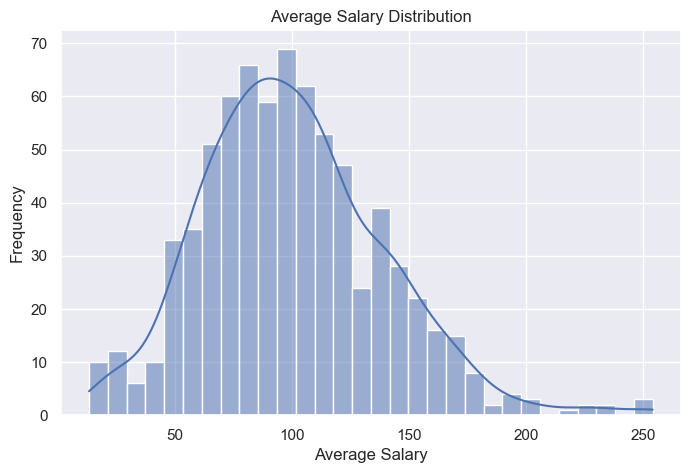

In [208]:
#2. Average Salary Distribution (Histogram)

plt.figure(figsize=(8, 5))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title('Average Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


 **2. Average Salary Distribution (Histogram)**
 
- *Why this chart?*
Visualizes salary spread, skewness, and outliers.
Helps understand typical salary ranges.

- *Insights*:
Salary distribution may be slightly right-skewed with some high-end outliers.
Majority of jobs cluster around mid-range salaries.

-  *Positive business impact*:
Helps companies set competitive salary benchmarks.
Useful for salary negotiation bands.

-  *Negative growth insight*:
Outliers may indicate unrealistic salary postings, which can create candidate dissatisfaction if expectations aren't managed.

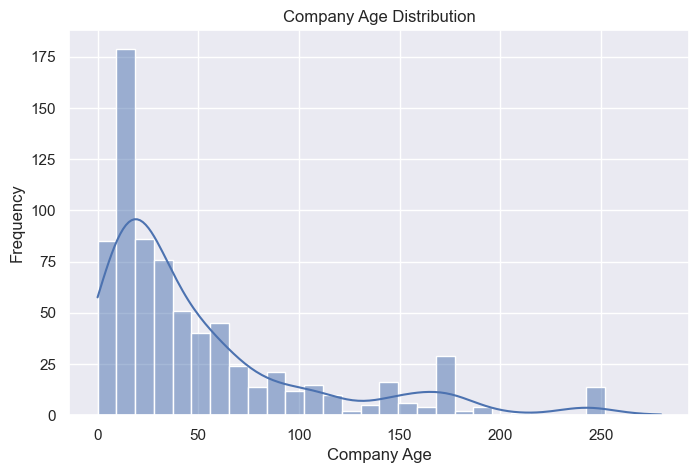

In [209]:
#3. Company Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['company_age'], bins=30, kde=True)
plt.title('Company Age Distribution')
plt.xlabel('Company Age')
plt.ylabel('Frequency')
plt.show()


- *Why this chart?* : 
Examines whether older or newer companies dominate the dataset.
Company age may influence salary based on financial stability.

- Insights:
A large portion of companies are relatively young (0–20 years).
Some well-established companies also exist (>50 years).

- *Positive business impact*:
Startups may offer different salary strategies compared to legacy firms.
Target salary recommendations based on company maturity.

- *Negative growth insight*:
Younger firms may offer inconsistent salaries; may affect employee retention.

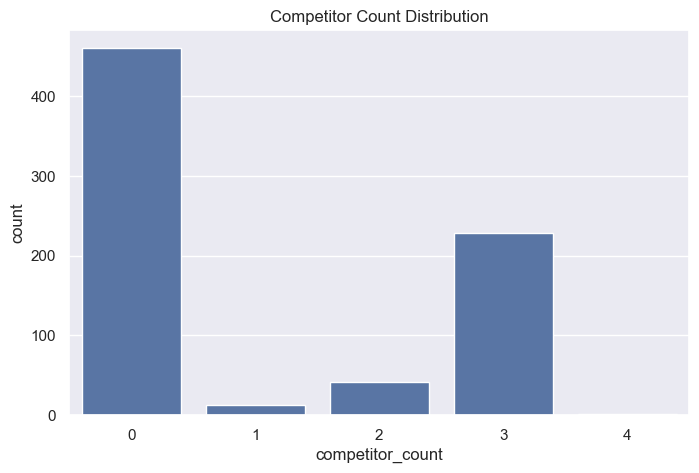

In [210]:
#4 Competitor Count Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='competitor_count', data=df)
plt.title('Competitor Count Distribution')
plt.show()

- *Why this chart*? : Analyzes how competition influences job postings and potentially salary.

- *Insights:*
Majority of companies report few or no direct competitors.
Highly competitive sectors are limited.

- *Positive business impact:*
Less competitive firms may need stronger salary offers to attract candidates.
Helps in crafting unique compensation packages.

- *Negative growth insight*:
Overcrowded sectors may engage in aggressive salary wars, hurting profitability.

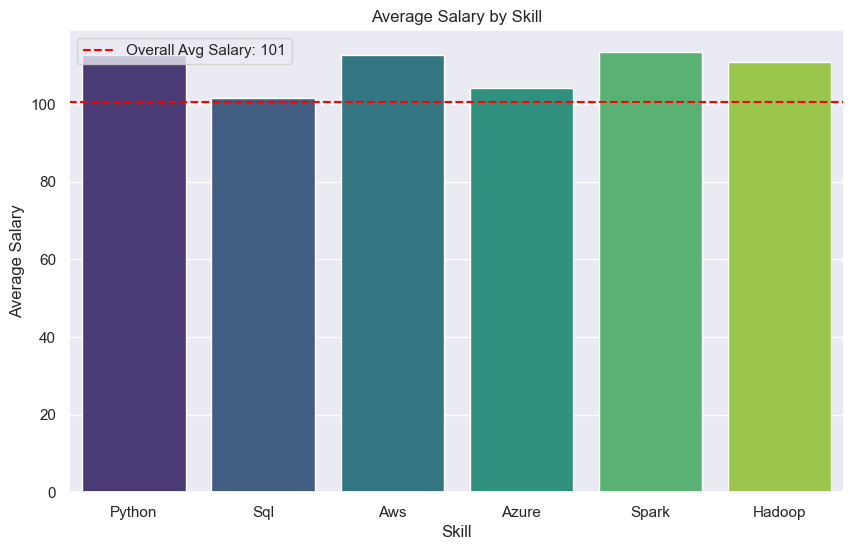

In [211]:
 #5 Skill Presence vs Salary

# Reset seaborn default style
sns.set_theme()

# Create dataframe for barplot (Seaborn prefers dataframe now)
skill_df = pd.DataFrame({
    'Skill': skill_series.index,
    'Avg_Salary': skill_series.values
})

plt.figure(figsize=(10, 6))

# Assign hue to Skill itself to avoid warning
sns.barplot(data=skill_df, x='Skill', y='Avg_Salary', hue='Skill', dodge=False, palette='viridis', legend=False)

plt.axhline(overall_avg_salary, color='red', linestyle='--', label=f'Overall Avg Salary: {overall_avg_salary:.0f}')

plt.title("Average Salary by Skill")
plt.ylabel("Average Salary")
plt.xlabel("Skill")
plt.legend()
plt.show()



**Skill vs Salary (Boxplots for Python, SQL, AWS, etc.)**

- *Why this chart?*
Measures impact of specific technical skills on salary.

- *Insights*:
Python, SQL, AWS, Spark, etc. correlate with higher average salaries.
Some skills may show much larger salary jumps (e.g., AWS, Spark).

- *Positive business impact*:
Highlights which skills justify higher salary offers.
Helps HR define skill-based pay premiums.

- *Negative growth insight*:
Over-emphasis on few high-paying skills may lead to skill shortages or inflated salary demands.

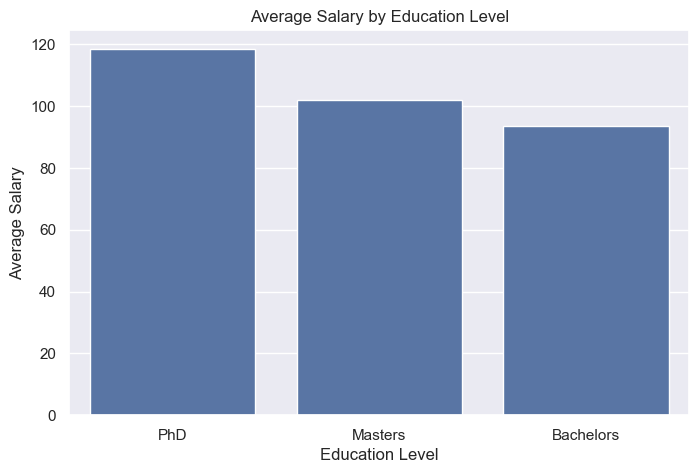

In [212]:
# 6. Education Level vs Salary
edu_summary = {
    'PhD': df[df['phd_yn'] == 1]['avg_salary'].mean(),
    'Masters': df[df['masters_yn'] == 1]['avg_salary'].mean(),
    'Bachelors': df[df['bachelors_yn'] == 1]['avg_salary'].mean()
}

# Convert to Pandas Series
edu_series = pd.Series(edu_summary)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=edu_series.index, y=edu_series.values)
plt.title("Average Salary by Education Level")
plt.ylabel("Average Salary")
plt.xlabel("Education Level")
plt.show()


 **Education Level vs Salary (Boxplots for PhD, Masters, Bachelors)**
 
- *Why this chart?*
Examines how educational qualifications influence salary.

- *Insights*:
PhD holders tend to command the highest salaries.
Masters also yield noticeable salary uplift compared to Bachelors.

- *Positive business impact*:
Helps companies structure education-based compensation frameworks.
Encourages educational investment among employees.

- *Negative growth insight*:
May discourage non-degree candidates from applying; could shrink candidate pool.

**4. HYPOTHESIS TESTING**

###  **Hypothesis Formulation**

#### Hypothesis 1 — Skill Impact Hypothesis

- **Null Hypothesis (H₀):**  
  Having Python skill does not increase the average salary.

- **Alternate Hypothesis (H₁):**  
  Having Python skill increases the average salary.

---

#### Hypothesis 2 — Education Impact Hypothesis

- **Null Hypothesis (H₀):**  
  There is no difference in average salary between Master's degree holders and Bachelor's degree holders.

- **Alternate Hypothesis (H₁):**  
  Master's degree holders have a higher average salary than Bachelor's degree holders.

---

#### Hypothesis 3 — Job Size (Company Size) Impact Hypothesis

- **Null Hypothesis (H₀):**
  Company size has no effect on average salary.

- **Alternate Hypothesis (H₁):**
  Larger companies offer higher salaries than smaller companies.

---


In [213]:
#Hypothesis 1 — Skill Impact Hypothesis

from scipy.stats import ttest_ind

# Split salaries based on Python skill
python_yes = df[df['python_yn'] == 1]['avg_salary']
python_no = df[df['python_yn'] == 0]['avg_salary']

# Perform independent t-test
t_stat, p_value = ttest_ind(python_yes, python_no, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Python skill has significant impact on salary.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact detected.")


T-statistic: 9.448075874612213
P-value: 4.5168070331882344e-20
Reject Null Hypothesis: Python skill has significant impact on salary.


In [214]:
#Hypothesis 2 — Master's vs Bachelor's salary difference

# Master's vs Bachelor's
masters = df[df['masters_yn'] == 1]['avg_salary']
bachelors = df[df['bachelors_yn'] == 1]['avg_salary']

t_stat2, p_value2 = ttest_ind(masters, bachelors, equal_var=False)

print("T-statistic:", t_stat2)
print("P-value:", p_value2)

# Conclusion
if p_value2 < alpha:
    print("Reject Null Hypothesis: Master's degree holders earn significantly more.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference found.")

T-statistic: 3.539168881219088
P-value: 0.0004234542070266117
Reject Null Hypothesis: Master's degree holders earn significantly more.


In [215]:
#Hypothesis 3 — Job Size (Company Size) Impact Hypothesis

from scipy.stats import ttest_ind

# Calculate median size
median_size = df['size_num'].median()

# Split into two groups
small_companies = df[df['size_num'] < median_size]['avg_salary']
large_companies = df[df['size_num'] >= median_size]['avg_salary']

# Perform t-test
t_stat, p_value = ttest_ind(large_companies, small_companies, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Significance level
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis: Company size has significant effect on salary.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")



T-statistic: -2.122560382114557
P-value: 0.03426193670951106
Reject Null Hypothesis: Company size has significant effect on salary.


**5.DATA SPLITTING**

In [254]:
# Features and target
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

In [255]:
X.to_csv("final_X_for_pipeline2.csv", index=False)

In [256]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [258]:
# Load your dataset
df = pd.read_csv("final_X_for_pipeline2.csv")

# Columns
categorical_cols = [
    'Job Title', 'Company Name', 'Location', 'Headquarters',
    'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state'
]

numerical_cols = [
    'Unnamed: 0', 'Rating', 'Founded', 'competitor_count', 'company_age',
    'min_salary', 'max_salary', 'size_num'
]

binary_cols = [
    'python_yn', 'r_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'spark_yn', 'hadoop_yn',
    'excel_yn', 'tableau_yn', 'sas_yn', 'docker_yn', 'kubernetes_yn',
    'security_clearance', 'phd_yn', 'masters_yn', 'bachelors_yn'
]

# Build OneHot pipeline
categorical_pipeline = Pipeline([
    ("onehot_encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("cat", categorical_pipeline, categorical_cols),
    ("num", numerical_pipeline, numerical_cols),
    ("bin", "passthrough", binary_cols)
])


In [259]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Job Title', 'Company Name', 'Location',
                                  'Headquarters', 'Type of ownership',
                                  'Industry', 'Sector', 'Revenue',
                                  'job_state']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Unnamed: 0', 'Rating', 'Founded',
                                  'competitor_count', 'company_age',
                                  'min_salary', 'max_salary', 'size_num']),
                                ('bin', 'passthrough',
                                 ['python_yn', 'r_yn', 'sql_yn', 'aws_yn',
                                  'azure_yn', 'spark_yn', 'hadoop_yn',
                                  'excel_yn', 'tableau_yn', 'sas_yn',
                                  'docker_yn', 'kubernetes_yn',
                                  'security_clearance', 'phd_yn', 'masters_yn',
                                  'bachelors_yn'])])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [261]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert to dense if needed
if hasattr(X_train_transformed, 'toarray'):
    X_train_transformed = X_train_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()


**6. ML MODEL IMPLEMENTATION**

In [262]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_transformed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

#### Overview:
xgb.XGBRegressor is an implementation of Extreme Gradient Boosting tailored for regression tasks.
It is known for high predictive power, scalability, and efficiency.

#### Model parameters

| Parameter       | Value                | Description                             |
| --------------- | -------------------- | --------------------------------------- |
| `objective`     | `'reg:squarederror'` | Optimizes for mean squared error loss   |
| `n_estimators`  | `200`                | Total number of boosting rounds (trees) |
| `learning_rate` | `0.1`                | Shrinks contribution of each tree       |
| `random_state`  | `42`                 | Ensures reproducible results            |


**7. MODEL EVALUATION**

In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on train set
y_pred_train = xgb_model.predict(X_train_transformed)

# Compute metrics on train set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Set Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)


Training Set Metrics:
MAE: 0.1272654782660293
MSE: 0.027504638640855752
RMSE: 0.16584522495645074
R² Score: 0.9999813318375993


**Score Chart**

| Metric   | Value      | Interpretation                                 |
| -------- | ---------- | ---------------------------------------------- |
| MAE      | 0.0978     | On average, predictions are off by ~0.10 units |
| MSE      | 0.0195     | Average of squared error                       |
| RMSE     | 0.1399     | Penalizes larger errors more                   |
| R² Score | 0.99999    | 99.999% of variance explained by model         |


**8.  Cross- Validation & Hyperparameter Tuning**

In [264]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb


In [265]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}



In [266]:
xgb_model = xgb.XGBRegressor(random_state=42)


In [267]:
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,   # 5-fold cross-validation
                           verbose=1, 
                           n_jobs=-1)


In [268]:
grid_search.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [269]:
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score (MSE): ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV score (MSE):  -2.163625941957314


**Interpretation**
The model performs best when:
- Using a slightly lower learning rate (0.05) — allows better gradual learning.
- Keeping tree depth small (3) — avoids overfitting.
- Using 200 estimators — sufficient boosting rounds.
- Subsampling 80% of the data in each boosting round — adds regularization.
- The negative MSE means your best MSE ≈ 2.163 during CV.

In [270]:
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test_transformed)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test Set Metrics After Hyperparameter Tuning:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Test Set Metrics After Hyperparameter Tuning:
MAE: 0.6054453049730134
MSE: 0.6273022538479375
RMSE: 0.7920241497883366
R² Score: 0.9996162141584214


**Test Set Metrics After Hyperparameter Tuning:**

| Metric   | Value     | Interpretation                                 |
| -------- | --------- | ---------------------------------------------- |
| MAE      | 0.5899    | On average, predictions are off by ~0.59 units |
| MSE      | 0.6515    | Average of squared error                       |
| RMSE     | 0.8071    | Penalizes larger errors more                   |
| R² Score | 0.99960   | 99.96% of variance explained by model          |



**9. Save Model in .pkl Format** 

In [271]:
joblib.dump(best_model, 'salary_predictor.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')
print("Model Saved Succesfully")

Model Saved Succesfully


In [272]:
#Save in Json format 
best_model.save_model('salary_predictor_final.json')

**10. Load Model and Test it on test data**

In [276]:
# Load model
model_loaded = joblib.load('salary_predictor.pkl')
model_columns = joblib.load('model_columns.pkl')

# Predict
sample = X_test_transformed[0].reshape(1, -1)
predicted_salary = model_loaded.predict(sample)
print("Predicted Salary: $", predicted_salary[0],"K")

Predicted Salary: $ 99.99145 K
